## Dataset Regresión Lineal

# Juan Sanabria

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
data = pd.read_csv("car data.csv")

# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(data.head())


Primeras filas del dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [3]:
# Resumen estadístico
print("\nResumen estadístico:")
print(data.describe())

# Comprobar y tratar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())
data.dropna(inplace=True)  # Eliminar filas con valores nulos



Resumen estadístico:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

Valores nulos por columna:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [5]:
# Convertir variables categóricas en variables dummy
data_dummies = pd.get_dummies(data, drop_first=True)

# Seleccionar características y variable objetivo
X = data_dummies.drop('Selling_Price', axis=1)  # Características
y = data_dummies['Selling_Price']  # Variable objetivo

print("\nCaracterísticas seleccionadas:")
print(X.columns)



Características seleccionadas:
Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Name_Activa 3g',
       'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       'Car_Name_Bajaj Avenger 220',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object', length=105)


In [7]:
# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Tamaño del conjunto de entrenamiento: (240, 105)
Tamaño del conjunto de prueba: (61, 105)


In [9]:
# Entrenar el modelo de Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("\nModelo entrenado exitosamente.")



Modelo entrenado exitosamente.


In [11]:
# Evaluar el desempeño del modelo
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados del modelo de Regresión Lineal:")
print("MSE:", mse)
print("R²:", r2)



Resultados del modelo de Regresión Lineal:
MSE: 9.225663641202349
R²: 0.5995038184042526


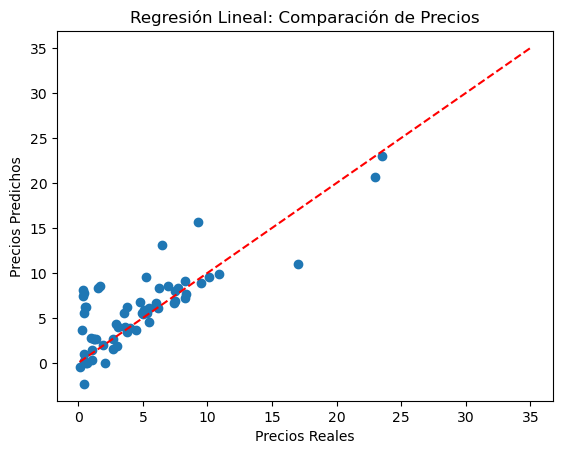

In [13]:
# Visualizar resultados
plt.scatter(y_test, y_pred)
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Regresión Lineal: Comparación de Precios")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Línea de referencia
plt.show()


## Dataset Regresión Logística

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.0000

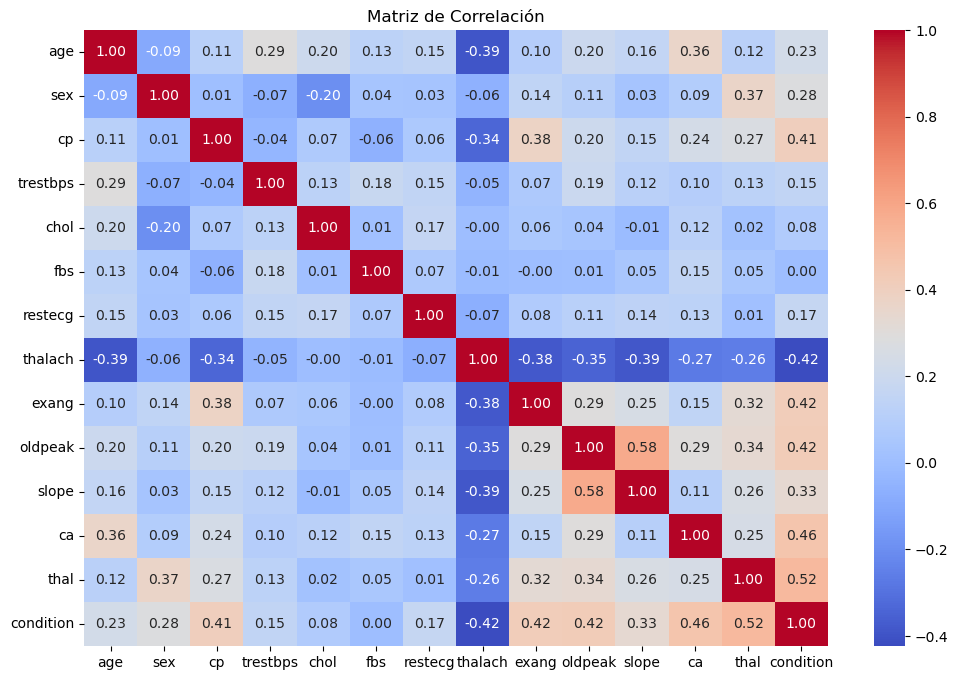

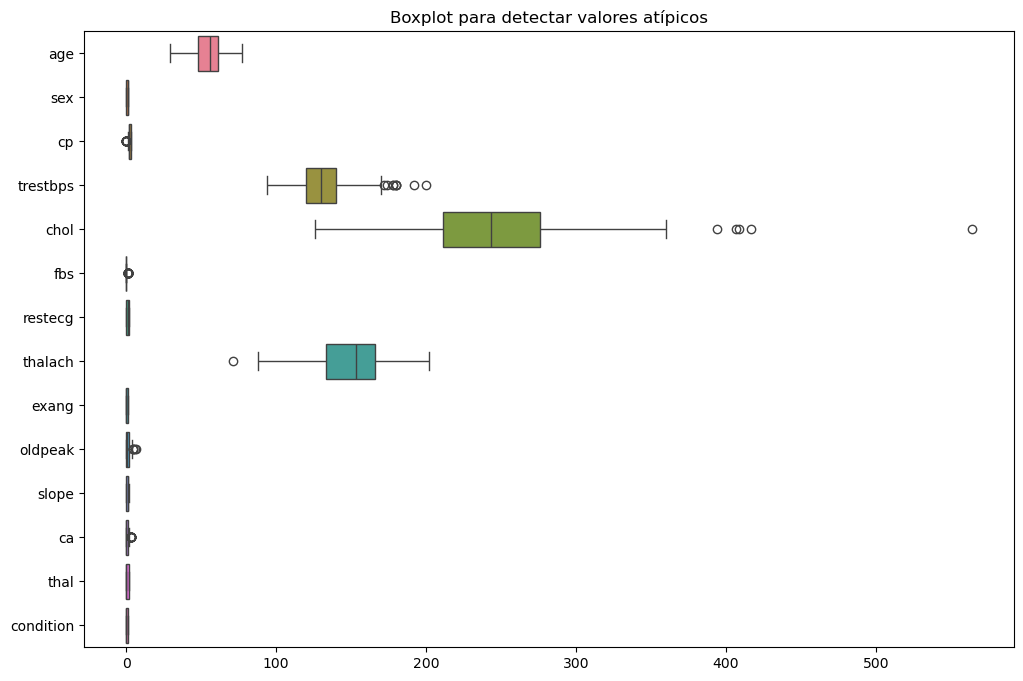

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
Características seleccionadas: Index(['fbs', 'exang', 'slope', 'ca', 'thal'], dtype='object')
[[23  9]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.72      0.82      0.77        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



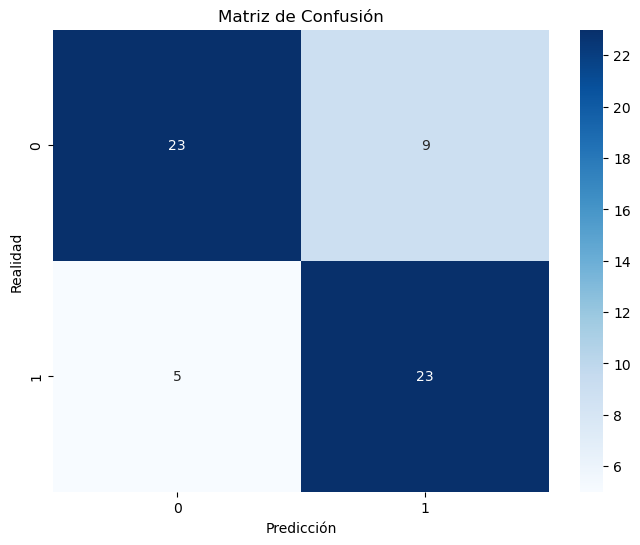

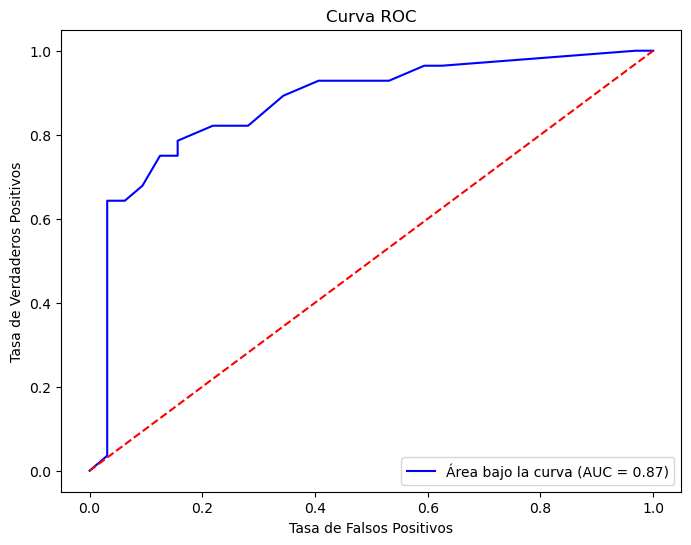

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import warnings

# Ignorar advertencias de convergencia
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.linear_model')

# 1. Cargar el conjunto de datos
data = pd.read_csv('heart_cleveland_upload.csv')

# 2. Análisis Exploratorio de Datos (EDA)
print(data.head())
print(data.describe())
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot para detectar valores atípicos')
plt.show()

# 3. Preprocesamiento de Datos
print(data.isnull().sum())
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Separar características y variable objetivo
X = data.drop('condition', axis=1)
y = data['condition']

# 4. Selección de Características
model = LogisticRegression(solver='lbfgs', max_iter=10000)  # Aumentar a 10000 iteraciones
selector = RFE(model, n_features_to_select=5)  # Ajusta el número de características
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Características seleccionadas:", selected_features)

# 5. Dividir el Dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Entrenar el Modelo
model.fit(X_train, y_train)

# 7. Evaluar el Desempeño del Modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 8. Visualización de Resultados
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Gráfica ROC
from sklearn.metrics import roc_curve, auc
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Área bajo la curva (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()


## Dataset Arboles de Decisión 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

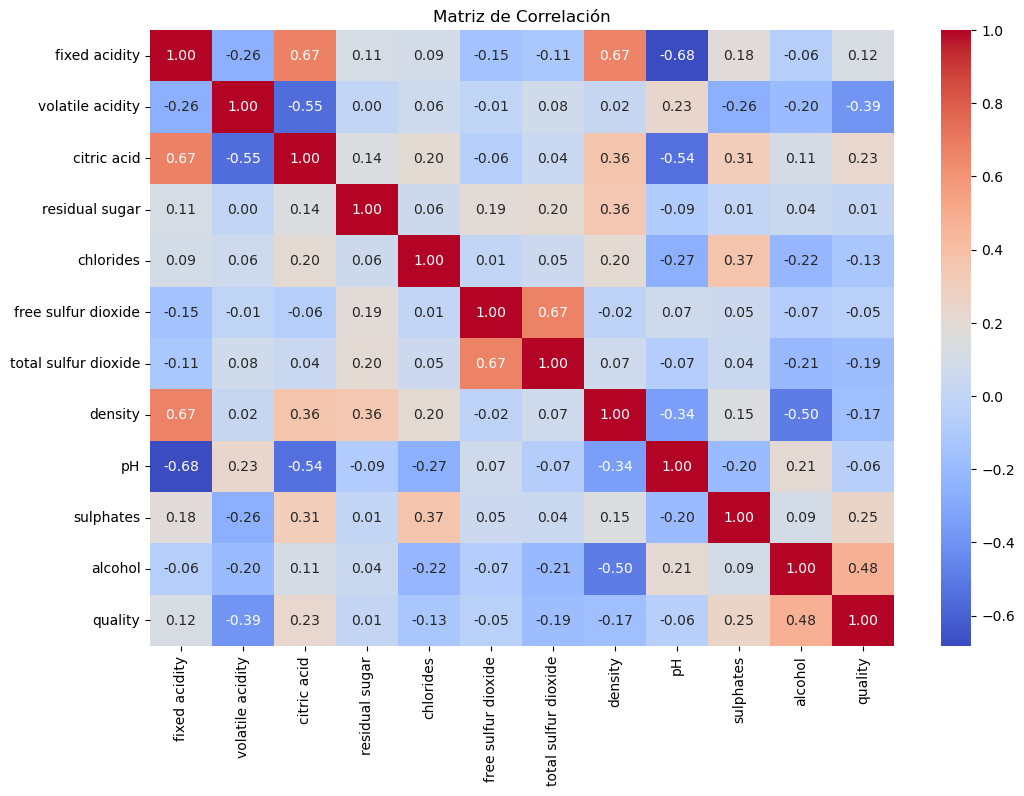

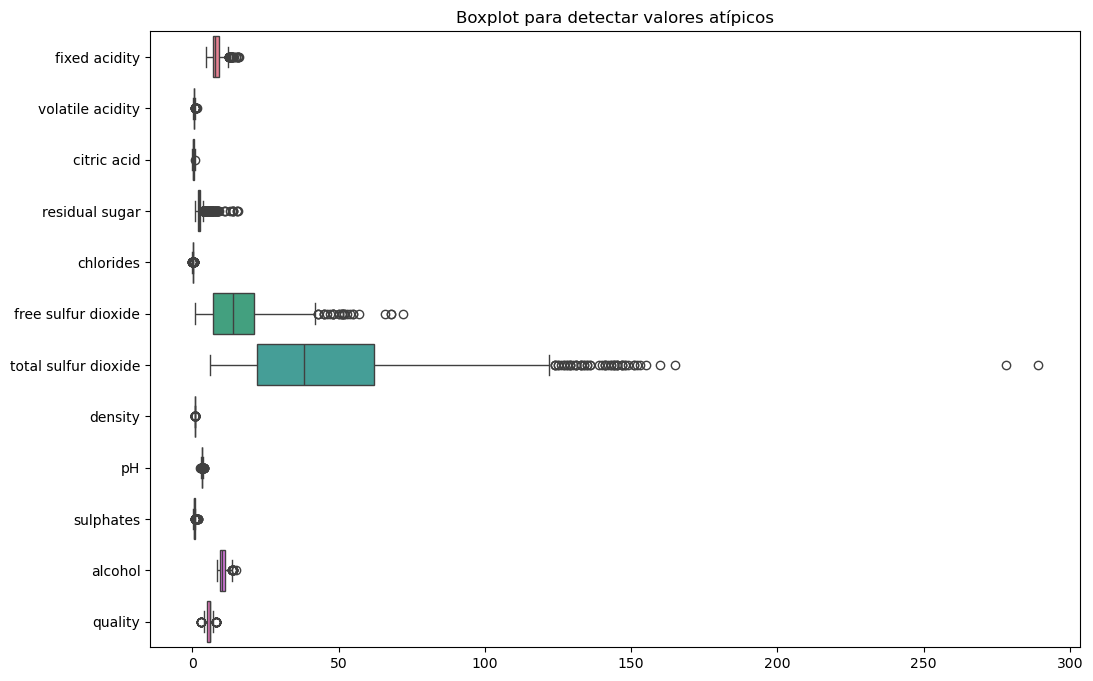

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Características seleccionadas: Index(['volatile acidity', 'residual sugar', 'total sulfur dioxide',
       'sulphates', 'alcohol'],
      dtype='object')
[[ 0  0  0  1  0  0]
 [ 0  2  4  4  0  0]
 [ 1  6 89 31  3  0]
 [ 0  4 35 74 18  1]
 [ 0  1  4 13 22  2]
 [ 0  0  0  3  2  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.15      0.20      0.17        10
           5       0.67      0.68      0.68       130
           6       0.59      0.56      0.57       132
           7       0.49      0.52      0.51        42
           8       0.00      0.00      0.00         5

    accuracy  

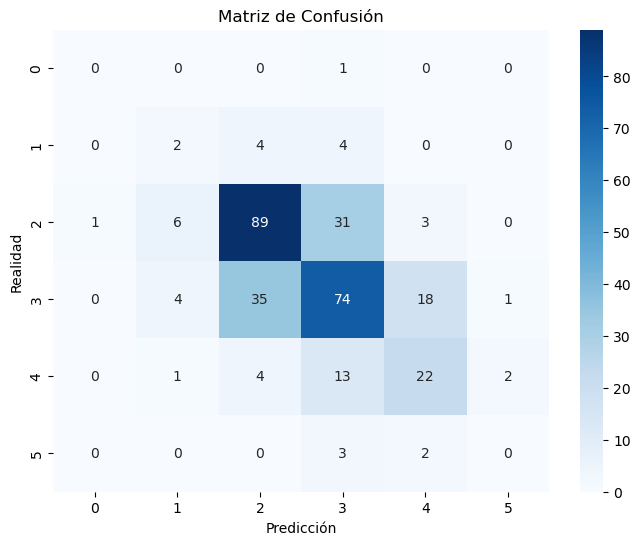

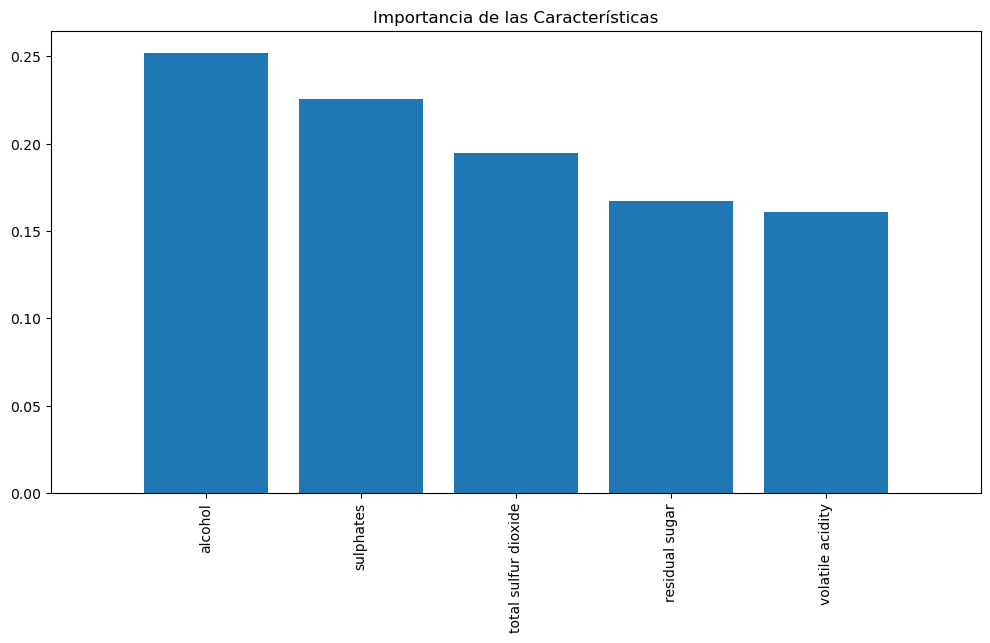

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import warnings

# Ignorar advertencias
warnings.filterwarnings("ignore")

# 1. Cargar el conjunto de datos
data = pd.read_csv('winequality-red.csv')

# 2. Análisis Exploratorio de Datos (EDA)
print(data.head())
print(data.describe())
print(data.info())

# Visualización de la correlación
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Visualizar boxplots para detectar valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot para detectar valores atípicos')
plt.show()

# 3. Preprocesamiento de Datos
print(data.isnull().sum())  # Comprobar valores faltantes
data = data.dropna()  # Eliminar filas con valores faltantes

# Separar características y variable objetivo
X = data.drop('quality', axis=1)
y = data['quality']

# 4. Selección de Características
model = DecisionTreeClassifier(random_state=42)
selector = RFE(model, n_features_to_select=5)  # Ajusta el número de características
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Características seleccionadas:", selected_features)

# Dividir el Dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# 5. Estandarizar las características (opcional, pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Entrenar el Modelo
model.fit(X_train, y_train)

# 7. Evaluar el Desempeño del Modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 8. Visualización de Resultados
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Gráfica de importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), selected_features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
